In [1]:
import pandas as pd
import nltk
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import string
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet


In [3]:
df=pd.read_csv('train.csv')
pd.set_option('display.max_colwidth',100)
df.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I m...",EAP
1,id17569,It never once occurred to me that the fumbling might be a mere mistake.,HPL
2,id11008,"In his left hand was a gold snuff box, from which, as he capered down the hill, cutting all mann...",EAP
3,id27763,How lovely is spring As we looked from Windsor Terrace on the sixteen fertile counties spread be...,MWS
4,id12958,"Finding nothing else, not even gold, the Superintendent abandoned his attempts; but a perplexed ...",HPL


In [4]:
import string
def remove_punctuation(x):
    
    try:
        x = ''.join(ch for ch in x if ch not in string.punctuation)
    except:
        pass
    return x
# Apply the function to the DataFrame
df['msg_clean'] = df['text'].apply(remove_punctuation)

In [5]:
#convert to lower
df['msg_clean_token']=df['msg_clean'].str.lower()

In [6]:
#removing stop words
sw = nltk.corpus.stopwords.words('english')
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)
# Apply the function to the DataFrame

df['stops']=df['msg_clean'].apply(lambda x:stopwords(x))


In [7]:
pst=PorterStemmer()
# for delete (ing,ed) from the words
def stemming(t):
    text=[pst.stem(w) for w in t.split() ]
    return ' '.join(text)
# Apply the function to the DataFrame

df['stemming']=df['stops'].apply(lambda x:stemming(x))

In [9]:
cv2=CountVectorizer()
df_sample=df[0:10]
x=cv2.fit_transform(df_sample['stemming'])
df1=pd.DataFrame(x.toarray(),columns=cv2.get_feature_names())

In [11]:
def length(text):    
    '''a function which returns the length of text'''
    return len(text)
df['length']=df['stemming'].apply(lambda x: length(x))

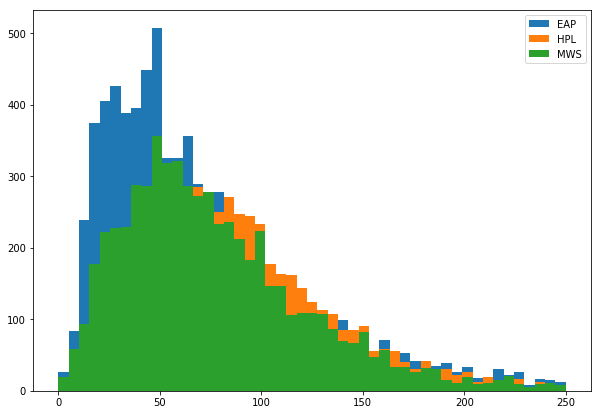

In [12]:
bins=np.linspace(0,250,50)
plt.figure(figsize=(10,7))
plt.hist(df[df['author']=='EAP']['length'],bins,label='EAP')
plt.hist(df[df['author']=='HPL']['length'],bins,label='HPL')
plt.hist(df[df['author']=='MWS']['length'],bins,label='MWS')
plt.legend(loc='upper right')
plt.show()
